## Preliminary Preprocessing

In [1]:
import re
import pandas as pd
from gensim.parsing.preprocessing import preprocess_documents

In [2]:
with open("The Lotus Sutra.txt", 'r') as f:
    full_text = f.read()

In [3]:
# Get chapter titles
chap_titles = []
for text in re.split(r"Chapter \d{1,2}\n", full_text)[1:]:
    title = re.search(r".+", text)
    chap_titles.append(title[0])

# Get chapter texts
start_str = 'The Lotus Sutra\nTranslated By H. Kern (1884)\nSacred Books of the East, Vol XXI.\n\n'
start_idx = full_text.find(start_str) + len(start_str)
target_text = full_text[start_idx:]
chap_texts = []
for text in re.split(r"\n\n\n", target_text):
    chap_text = re.sub(r"^Chapter \d{1,2}\n\n.+\n\n", r"",text)
    chap_texts.append(chap_text)

# Store in DataFrame
chapters = pd.DataFrame({'title':chap_titles, 'text':chap_texts}, index=range(1,28))
chapters.index.name = 'chapter'
chapters

,title,text
chapter,,
1,INTRODUCTORY.,Thus have I heard. Once upon a time the Lord w...
2,SKILFULNESS,The Lord then rose with recollection and consc...
3,A PARABLE.,"Then the venerable Sâriputra, pleased, glad, c..."
4,DISPOSITION.,"As the venerable Subhûti, the venerable MahâKâ..."
5,ON PLANTS.,Thereupon the Lord addressed the venerable Mah...
6,ANNOUNCEMENT OF FUTURE DESTINY.,After pronouncing these stanzas the Lord addre...
7,ANCIENT DEVOTION.,"Of yore, monks, in the past, incalculable, mor..."
8,ANNOUNCEMENT OF THE FUTURE DESTINY OF THE FIVE...,On hearing from the Lord that display of skilf...
9,"ANNOUNCEMENT OF THE FUTURE DESTINY OF ÂNANDA, ...",On that occasion the venerable Ânanda made thi...


In [4]:
verses = pd.DataFrame(columns=['chapter', 'title', 'verse_num', 'text'])

for i, chapter_text in enumerate(chapters['text']):
    # Get chapter verses
    chap_verses = []
    for text in re.findall(r"\d{1,3}. .+", chapter_text):
        verse = re.sub(r"^\d{1,3}. ", r"", text)
        chap_verses.append(verse)
    
    # Add new verses
    new_verses = pd.DataFrame([i+1] * len(chap_verses), columns=['chapter'])
    new_verses['title'] = [chapters.loc[i+1, 'title']] * len(chap_verses)
    new_verses['verse_num'] = range(1, len(chap_verses)+1)
    new_verses['text'] = chap_verses
    verses = pd.concat([verses, new_verses], ignore_index=True)

verses

,chapter,title,verse_num,text
0,1,INTRODUCTORY.,1,"Why, Mañgusrî, does this ray darted by the gui..."
1,1,INTRODUCTORY.,2,"The gods, overjoyed, let drop Mañgûshakas and ..."
2,1,INTRODUCTORY.,3,"This earth is, on every side, replete with spl..."
3,1,INTRODUCTORY.,4,And that ray in the eastern quarter illuminate...
4,1,INTRODUCTORY.,5,(The universe) as far as the (hell) Aviki (and...
...,...,...,...,...
1223,24,"CHAPTER CALLED THAT OF THE ALL-SIDED ONE, CONT...",31,There no women are to be found; there sexual i...
1224,24,"CHAPTER CALLED THAT OF THE ALL-SIDED ONE, CONT...",32,And the Chief Amitâbha himself is seated on a ...
1225,24,"CHAPTER CALLED THAT OF THE ALL-SIDED ONE, CONT...",33,"The Leader of the world, whose store of merit ..."
1226,25,ANCIENT DEVOTION.,1,"Allow us, O mother, to go forth from home and ..."


## Word Cloud

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
def preprocess(texts):
    '''Preprocess documents'''
    prep_texts = preprocess_documents(texts)
    stop_words = ['thou', 'hast', 'mayst', 'art', 'thee', 'shalt', 'thy', 'shall']
    for text in prep_texts:
        for word in stop_words:
            while word in text:
                text.remove(word)
    return prep_texts

In [7]:
def generate_word_cloud(texts, random_state=370):
    '''
    Preprocess documents and generates a word cloud.

    Args:
        text: Set of documents to use for word cloud
    '''
    prep_text = preprocess(texts) # Preprocess texts
    prep_text = [' '.join(chapter_text) for chapter_text in prep_text] # Join text for each chapter
    prep_text = ' '.join(prep_text) # Join all text

    word_cloud = WordCloud(width = 1500, height = 800, 
                           background_color='white', min_font_size=10, random_state=random_state)
    chapters_cloud = word_cloud.generate(prep_text)

    plt.figure(figsize=(15,8), facecolor=None)
    plt.imshow(chapters_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

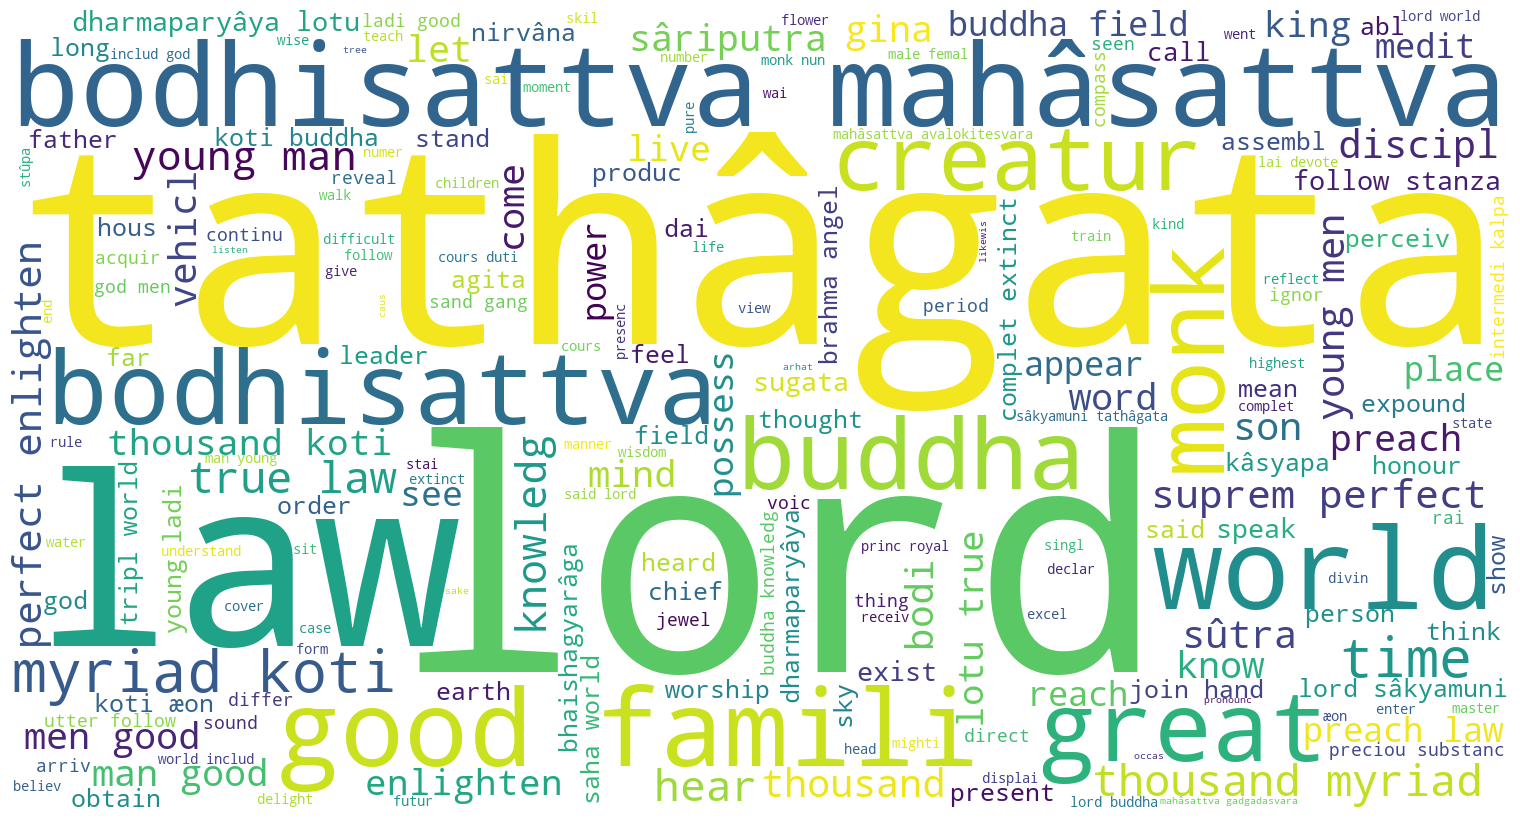

In [8]:
generate_word_cloud(chapters['text'])
plt.savefig('chapters_word_cloud.png')
plt.show()

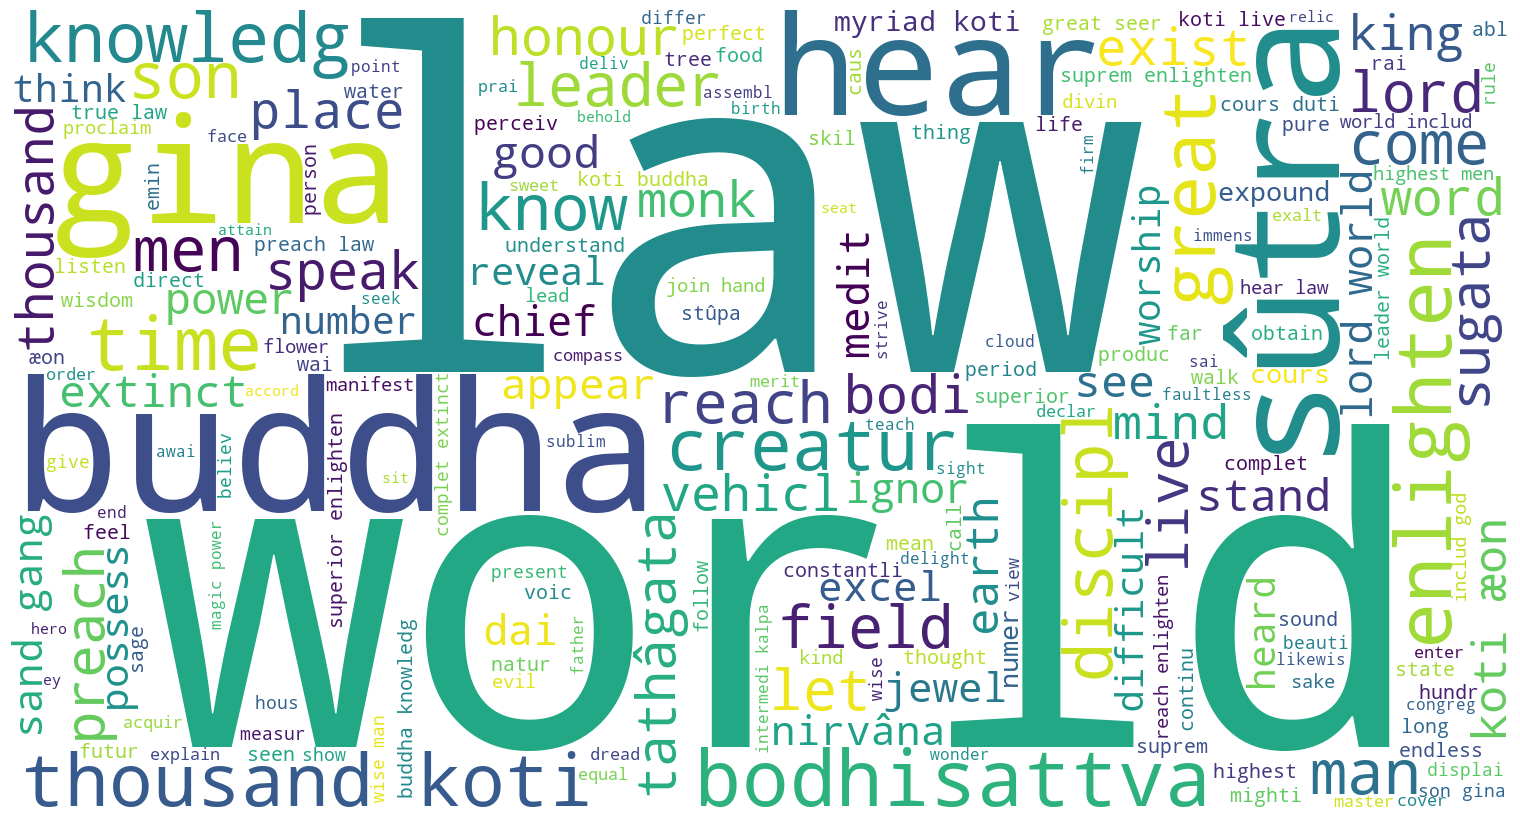

In [9]:
generate_word_cloud(verses['text'])
plt.savefig('verses_word_cloud.png')
plt.show()

## Network Analysis

In [10]:
def create_bigram_network_data(data:pd.Series, window:int, filter=1):
    '''
    Preprocess documents and return DataFrames containing Gephi-compatible
    information of nodes and edges for a network.

    Args:
        data: Set of documents to preprocess and create bigrams out of
        window: The number of words that can separate two other words that 
        co-occur in a document to be counted as a bigram
        filter: The minimum bigram count to be included
    '''
    docs = preprocess(data)
    bigram_counts = {}

    for text in docs:
        for i, word in enumerate(text):
            # Look at all words in front of the current word
            # We will not look at the previous words, since they should have already been looked at
            for j in range(1, i+window+1):
                if (j < 0) or (j >= len(text)): # Skip if j is out of bounds
                    continue
                
                bigram = frozenset({word, text[j]})
                if bigram in bigram_counts:
                    bigram_counts[bigram] += 1
                else:
                    bigram_counts[bigram] = 1

    # Create edges DataFrame
    edges = pd.DataFrame([list(bigram) if len(bigram) == 2 else list(bigram)*2 for bigram in bigram_counts.keys()], columns=['Target', 'Source'])
    edges['Weight'] = bigram_counts.values()

    # Filter
    edges = edges[edges['Weight'] >= filter]
    edges.reset_index(drop=True, inplace=True)

    nodes = pd.concat([edges['Target'], edges['Source']]).unique()
    nodes = pd.Series(nodes)
    nodes.name = 'Id'

    return nodes, edges

In [11]:
chapters_nodes, chapters_edges = create_bigram_network_data(chapters['text'], window=20, filter=1000)
verses_nodes, verses_edges = create_bigram_network_data(verses['text'], window=500, filter=10) # Window is the verse length

In [16]:
chapters_nodes.to_csv('chapters_nodes.csv', index=False)
chapters_edges.to_csv('chapters_edges.csv', index=False)

verses_nodes.to_csv('verses_nodes.csv', index=False)
verses_edges.to_csv('verses_edges.csv', index=False)

In [18]:
verses_edges[verses_edges['Target'] == 'displai']

,Target,Source,Weight
424,displai,displai,16


## Topic Modeling

In [8]:
import gensim.corpora as corpora
from gensim.models import LdaModel, CoherenceModel
import pyLDAvis.gensim_models
from pyLDAvis import enable_notebook, save_html

In [9]:
from warnings import filterwarnings
filterwarnings('ignore', category=DeprecationWarning)

In [10]:
enable_notebook()

In [11]:
def generate_lda_model(texts, num_topics:int, compute_coherence=True, random_state=370):
    '''
    Preprocess documents, then generate a latent Dirichlet allocation (LDA) model.

    Args:
        texts: Set of documents to preprocess and fit the topic model out of
        num_topics: Number of topics in the topic model
        compute_coherence: If True, fit a coherence model and return coherence scores
        random_state: Random state for fitting LdaModel
    
    Returns:
        Dictionary: Maps word IDs to words
        LdaModel: Fitted LDA model
        PreparedData: Prepared visualization of LdaModel
    '''
    # Fit LDA model
    prep_texts = preprocess(texts)
    id2word = corpora.Dictionary(prep_texts)
    corpus = [id2word.doc2bow(text) for text in prep_texts]  
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=random_state)

    # Print coherence scores
    if compute_coherence:
        coherence_model = CoherenceModel(lda_model, texts=prep_texts, dictionary=id2word, coherence='c_v')
        print("Coherence:", coherence_model.get_coherence())
        for topic, coherence in enumerate(coherence_model.get_coherence_per_topic()):
            print(f"Coherence for topic {topic+1}: {coherence}")
    
    # Prepare visualization
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

    return id2word, lda_model, vis


def predict_topic(text, id2word:corpora.Dictionary, lda_model:LdaModel) -> tuple[int, float]:
    '''
    Predict topic of a document from an LDA model.

    Args:
        text: Text of the document
        id2word: Dictionary mapping word IDs to words
        lda_model: LDA model to predict topics from
    '''
    prep_text = preprocess([text])[0]
    corpus =  id2word.doc2bow(prep_text)
    doc_topics = lda_model.get_document_topics(corpus)

    # Get topic with the highest probability
    topic = -1
    prob = 0.0
    for doc_topic in doc_topics:
        if doc_topic[1] > prob:
            topic = doc_topic[0]
            prob = doc_topic[1]
    return topic, prob

### By chapters

In [12]:
chapters_id2word, chapters_model, chapters_vis = generate_lda_model(chapters['text'], num_topics=5)
save_html(chapters_vis, 'chapters_lda.html')
chapters_vis

Coherence: 0.33861148598292995
Coherence for topic 1: 0.3733281555215503
Coherence for topic 2: 0.33608410472629546
Coherence for topic 3: 0.3044756216557822
Coherence for topic 4: 0.36032969628904377
Coherence for topic 5: 0.3188398517219779


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.009224 -0.008274       1        1  36.654341
3      0.002781  0.008883       2        1  28.140673
0      0.001203  0.003739       3        1  22.867336
4     -0.002308 -0.000030       4        1  11.566963
1     -0.010899 -0.004317       5        1   0.770687, topic_info=            Term        Freq       Total Category  logprob  loglift
494         lord  736.000000  736.000000  Default  30.0000  30.0000
846    tathâgata  610.000000  610.000000  Default  29.0000  29.0000
102  bodhisattva  591.000000  591.000000  Default  28.0000  28.0000
117       buddha  359.000000  359.000000  Default  27.0000  27.0000
261    enlighten  284.000000  284.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
867         time    1.185424  199.484850   Topic5  -5.6204  -0.2600
516   mahâsattva    1.286077  252.880797   Topic5  -5.5389  -0.4157
569       myriad    1.042937  158.290858   Topic5  -5.7484  -0.1567
620      perfect    1.086051  183.408232   Topic5  -5.7079  -0.2635
177      creatur    0.987170  171.442678   Topic5  -5.8034  -0.2915

[414 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
2507      1  0.401290  abhigñâgñânâbhibhû
2507      2  0.401290  abhigñâgñânâbhibhû
2507      3  0.401290  abhigñâgñânâbhibhû
1426      1  0.150498                ador
1426      2  0.526744                ador
...     ...       ...                 ...
968       5  0.006284               young
2232      2  0.446237             younger
2232      4  0.446237             younger
3545      1  0.661961           âbhâsvara
3545      3  0.330981           âbhâsvara

[915 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

In [13]:
result = chapters['text'].apply(lambda text: predict_topic(text, chapters_id2word, chapters_model))
chapters[['topic', 'prob']] = result.to_list()
chapters

,title,text,topic,prob
chapter,,,,
1,INTRODUCTORY.,Thus have I heard. Once upon a time the Lord w...,2.0,0.710736
2,SKILFULNESS,The Lord then rose with recollection and consc...,2.0,0.998216
3,A PARABLE.,"Then the venerable Sâriputra, pleased, glad, c...",2.0,0.973104
4,DISPOSITION.,"As the venerable Subhûti, the venerable MahâKâ...",4.0,0.878730
5,ON PLANTS.,Thereupon the Lord addressed the venerable Mah...,2.0,0.520171
6,ANNOUNCEMENT OF FUTURE DESTINY.,After pronouncing these stanzas the Lord addre...,3.0,0.907795
7,ANCIENT DEVOTION.,"Of yore, monks, in the past, incalculable, mor...",0.0,0.993940
8,ANNOUNCEMENT OF THE FUTURE DESTINY OF THE FIVE...,On hearing from the Lord that display of skilf...,2.0,0.832796
9,"ANNOUNCEMENT OF THE FUTURE DESTINY OF ÂNANDA, ...",On that occasion the venerable Ânanda made thi...,0.0,0.622635


In [42]:
chapters.drop('text', axis=1).to_csv('chapters.csv')

### By verses

In [15]:
verses_id2word, verses_model, verses_vis = generate_lda_model(verses['text'], num_topics=5)
save_html(verses_vis, 'verses_lda.html')
verses_vis

Coherence: 0.23823342384649243
Coherence for topic 1: 0.22136709579953134
Coherence for topic 2: 0.21423127363182165
Coherence for topic 3: 0.2365178905032444
Coherence for topic 4: 0.3114428994457973
Coherence for topic 5: 0.20760795985206754


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.040819 -0.008296       1        1  28.921318
2     -0.015172  0.050252       2        1  22.141562
0     -0.016758  0.035799       3        1  19.447237
1     -0.026968 -0.069284       4        1  18.098330
4      0.099717 -0.008472       5        1  11.391553, topic_info=          Term        Freq       Total Category  logprob  loglift
126       hear   81.000000   81.000000  Default  30.0000  30.0000
80        voic   29.000000   29.000000  Default  29.0000  29.0000
253    highest   39.000000   39.000000  Default  28.0000  28.0000
73        koti  154.000000  154.000000  Default  27.0000  27.0000
661        abl   19.000000   19.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
73        koti    6.623062  154.109984   Topic5  -5.5650  -0.9748
38      buddha    6.547616  155.649799   Topic5  -5.5765  -0.9962
48          be    6.158782  105.197786   Topic5  -5.6377  -0.6657
575        æon    5.608500   58.684991   Topic5  -5.7313  -0.1756
119  enlighten    6.076141  130.403619   Topic5  -5.6512  -0.8940

[415 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
661       1  0.101727       abl
661       3  0.101727       abl
661       4  0.661226       abl
661       5  0.101727       abl
1658      1  0.760595  accommod
...     ...       ...       ...
575       2  0.170401       æon
575       3  0.323763       æon
575       4  0.204482       æon
575       5  0.102241       æon
1000      4  0.815332    îsvara

[796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

In [16]:
result = verses['text'].apply(lambda text: predict_topic(text, verses_id2word, verses_model))
verses[['topic', 'prob']] = result.to_list()
verses

,chapter,title,verse_num,text,topic,prob
0,1,INTRODUCTORY.,1,"Why, Mañgusrî, does this ray darted by the gui...",3.0,0.952288
1,1,INTRODUCTORY.,2,"The gods, overjoyed, let drop Mañgûshakas and ...",0.0,0.926653
2,1,INTRODUCTORY.,3,"This earth is, on every side, replete with spl...",2.0,0.936950
3,1,INTRODUCTORY.,4,And that ray in the eastern quarter illuminate...,3.0,0.942027
4,1,INTRODUCTORY.,5,(The universe) as far as the (hell) Aviki (and...,0.0,0.948944
...,...,...,...,...,...,...
1223,24,"CHAPTER CALLED THAT OF THE ALL-SIDED ONE, CONT...",31,There no women are to be found; there sexual i...,2.0,0.949150
1224,24,"CHAPTER CALLED THAT OF THE ALL-SIDED ONE, CONT...",32,And the Chief Amitâbha himself is seated on a ...,1.0,0.932457
1225,24,"CHAPTER CALLED THAT OF THE ALL-SIDED ONE, CONT...",33,"The Leader of the world, whose store of merit ...",0.0,0.679312
1226,25,ANCIENT DEVOTION.,1,"Allow us, O mother, to go forth from home and ...",2.0,0.937797


In [21]:
verses.to_csv('verses.csv', index=False)